The Data Analytics Library also comes with support for FMU files, which is a thin wrapper over the `pyfmi` module. This article introduces the basic usage of this API.

In [1]:
from UTCDAL.API import FMU
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import time

You can instantiate a FMU object by providing the FMU path, kind of fmu (co-simulation 'CS' or model exchange 'ME'), and log_level. If some problem happens during simulation, you can always come back and change the `log_level` to 7 to see what was going on.

In [2]:
m = FMU('fmu_demo.fmu', kind='CS', log_level=3)

Usually, we read the inputs to the model recorded in another file.

In [3]:
with open('inputs.csv', 'r') as f:
    content = f.readlines()
input_names = [i.split(',')[0].strip() for i in content]
input_values = [float(i.split(',')[1].strip()) for i in content]

Define a function to easily plot the results.

In [4]:
def plotvar(var):
    plt.plot(res['time'], res[var])

**The `simulation` method**

If no additional parameters provided, simulation runs with default parameters embeded within the FMU file.

In [5]:
m.reset()
res = m.simulate(final_time=1000)

Simulation interval    : 0.0 - 1000.0 seconds.
Elapsed simulation time: 5.374777699492758 seconds.


All results are stored in the `res` variable, and values can be accessed just like using a dict.

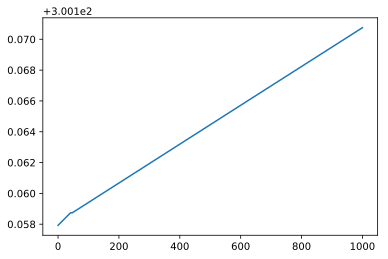

In [6]:
plotvar('summary.EWT_c')

Since we want to set some parameters, we need to call `set` method before simulation:

In [7]:
m.reset()
for i, v in zip(input_names[:], input_values[:]):
    m.set(i, v)
res = m.simulate(final_time=1000)

Simulation interval    : 0.0 - 1000.0 seconds.
Elapsed simulation time: 5.44039061455754 seconds.


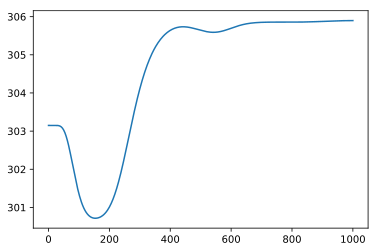

In [8]:
plotvar('summary.EWT_c')

We can also use `do_step` method to replicate the above process, but manually control the steps. In this approach, you have to manually control the step size, and also need to manually retrieve the interested variable values. 

This approach can be very useful for some scenarios, for instance when you need the simulation to run at real time.

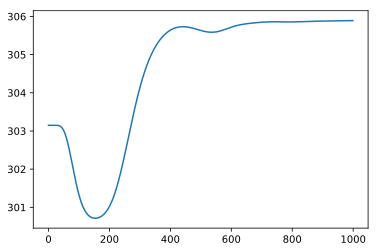

In [12]:
m.reset()

res = []
for i, v in zip(input_names[:], input_values[:]):
    m.set(i, v)

m.setup_experiment()
m.initialize()
current = 0
dt = 1
for _ in range(1000):
    status = m.do_step(current, dt, True)
    res.append(m.get('summary.EWT_c'))
    current += dt

plt.plot(res)